Fecha: 04/04/2019

Introducción a la Programación y Análisis Numérico - Unidad 3
============

**a)** Se quiere encontrar los puntos de intersección de la función $f(x)=\mathrm{tan}(\pi-x)$ con la recta $y=x$. Encontrar gráficamente las soluciones en el intervalo $\left[-\pi/2,3\pi/2\right]$. Indicar cuántas soluciones hay y alrededor de qué valores se encuentran.  

**Solución:** Se observan dos puntos de intersección, uno en torno a (0,0) y el segundo en torno a (2,2).  
>*Aclaración*: la recta vertical que se observa a la derecha de x=1.5 no forma parte de la gráfica de la función $f$ sino que es la asíntota de dicha función.

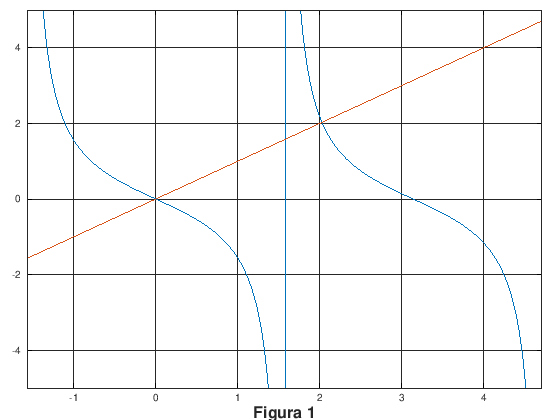

In [2]:
f=@(x)tan(pi-x);
x=-pi/2:0.01:3*pi/2;
plot(x,f(x),x,x)
axis([-pi/2 3*pi/2 -5 5])
grid on
xlabel('Figura 1','FontSize',16,'FontWeight','bold')

**b)** A los fines de encontrar una aproximación numérica a la solución en el intervalo $\left[1.5,3\right]$ uno de los  estudiante decide utilizar el código bisec.m visto en clase, el cual implementa el algoritmo de bisección, y tipea la sentencia **bisec(g,1.5,3,1\*10^-4,50)**.  

**i.**  ¿Cómo ha de definir la función g para lo que se propone?  
**ii.** ¿Qué solución obtiene? ¿Por qué?  

**Solución:** **i.** Como los puntos de intersección de la gráfica son tales que $\mathrm{tan}(\pi-x)=x$, para poder encontralos mediante el *método de bisección*, el cual calcula raíces de una función $g$, se debe definir $g(x)=f(x)-x=\mathrm{tan}(\pi-x)-x$. **ii.** El resultado de la ejecución del algoritmo para estos parámetros de entrada resulta en el mensaje **¡¡¡Error!!!**. Esto sucede debido a que, como se ve de la **Figura 1**, tanto en $x=1.5$ como en $x=3$ la función $f$ está por debajo de la recta $y=x$, es decir que el valor de la resta $\mathrm{tan}(\pi-x)-x$ es en ambos casos negativo, por lo tanto $g(a).g(b)>0$ y no se ejecuta el algoritmo de bisección (ver línea 14 del código bisec.m).

In [ ]:
function [x] = bisec(g,a,b,TolX,MaxIter)
%%
%bisec.m resuelve la igualdad g(x) = 0 mediante el método de bisección.
%ENTRADAS: g = función definida por línea de comando como función anónima
         % a,b = extremos del intervalo en donde se busca una raíz de g
         % TolX = cota superior del error |x(k) - x0|
         % MaxIter = máximo número de iteraciones
% SALIDA: x = valor que devuelve el algoritmo como aproximación a la raíz de g
%%
ga = g(a); 
gb = g(b);
if ga*gb > 0, 
    fprintf('¡¡¡Error!!!'), 
end
for k = 1: MaxIter
  xx = (a + b)/2; 
  gx = g(xx); 
  err = (b-a)/2; 
   if abs(err)<TolX, 
       break; 
   elseif gx*ga > 0,                       
       a = xx;       
       ga = gx;
   else
       b = xx;       
   end               
end
x = xx;
if k==MaxIter,     
    fprintf('La mejor estimación luego de %d iteraciones\n',MaxIter), 
end

**c)** Un segundo estudiante propone utilizar el código con los mismos parámetros de entrada pero realizando la búsqueda en un intervalo menor $\left[1.5,2\right]$.    

**i.** ¿Qué sentencia deberá tipear? ¿Qué solución obtiene?  
**ii.** ¿Es la solución correcta? ¿Cómo lo sabe? Explicar por qué se llega a este resultado.  

**Solución:** **i.** Se mantienen los mismos valores para los parámetros de entrada TolX y MaxIter pero cambió el valor del extremo superior del intervalo inicial ($b=3\rightarrow 2$). La sentencia a tipear es entonces **bisec(g,1.5,2,1\*10^-4,50)**; el algoritmo se ejecuta y arroja como resultado **x=1.5707**. **ii** El resultado que se encuentra como estimación de la raíz de $g$ es erróneo. Según se ve de la **Figura 1**, cuando el valor de $x$ se acerca a $\pi/2$ la función $f$ tiene una asíntota vertical, con lo cual no puede intersectarse con la recta $y=x$, y por lo tanto $g(x)=f(x)-x$ no se anulará. Si evaluamos la función $g$ en el valor obtenido como estimación, obtenemos **g(1.5707)=-1.0383e+04**, que está muy lejos de ser 0, y la situación no mejora al aumentar el número de iteraciones. Aunque en este caso la ejecución del algoritmo no produce un mensaje de error ya que $g(1.5).g(2)<0$, y por lo tanto el algoritmo se ejecuta, la solución que encuentra no es la correcta. Esto sucede debido a que la función $g$ no es continua en el intervalo de búsqueda, condición necesaria para afirmar que $g$ pasará por el valor 0 antes de cambiar de signo, afirmación en la que se basa el *método de bisección*.  

**d)** Vanina, una tercer estudiante del curso, decide utilizar el método de punto fijo para encontrar la solución cercana a $x=2$. Para ello decide probar con dos funciones para la iteración de punto fijo: $h_1(x)=\mathrm{tan}(\pi-x)$ y $h_2(x)=\pi-\mathrm{tan}^{-1}(x)$, tomando como valor inicial $x_0=2$. ¿Cuál de las dos opciones es la indicada para hallar la solución? ¿Por qué?  

**Solución:** En el intervalo $\left[1.5,3\right]$ ambas funciones tienen un único punto fijo $x^o$, como se puede observar en la **Figura 2**. La convergencia del algoritmo de *punto fijo* estará garantizada cuando la función $h$ elegida para la iteración ($x_k=h(x_{k-1})$) es continua en un entorno de $x^o$ y además $\vert h'(x)\vert \le c <1$. Entonces, la función adecuada será $h_2$ ya que $\vert h_2'(x)\vert <0.5$ en $\left[1.5,3\right]$, en tanto que $\vert h_1'(x)\vert >1$ (**Figura 3**).

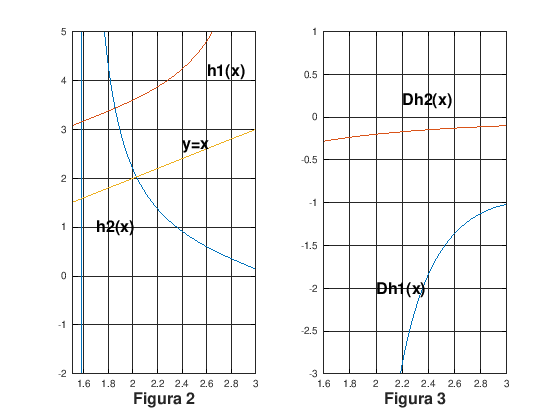

In [2]:
Dh1=@(x) -1./(cos(x).^2);
Dh2=@(x) -1./(1+x.^2);
h1=@(x) tan(pi-x);
h2=@(x) pi-tan(x).^-1;
t=1.51:0.01:3;
subplot(1,2,1)
plot(t,h1(t),t,h2(t),t,t)
axis([1.51 3 -2 5])
grid on
xlabel('Figura 2','FontSize',16,'FontWeight','bold')
text(2.6,4.2,'h1(x)','FontSize',16,'FontWeight','bold')
text(1.7,1,'h2(x)','FontSize',16,'FontWeight','bold')
text(2.4,2.7,'y=x','FontSize',16,'FontWeight','bold')
subplot(1,2,2)
plot(t,Dh1(t),t,Dh2(t))
axis([1.6 3 -3 1])
grid on
xlabel('Figura 3','FontSize',16,'FontWeight','bold')
text(2,-2,'Dh1(x)','FontSize',16,'FontWeight','bold')
text(2.2,0.2,'Dh2(x)','FontSize',16,'FontWeight','bold')